# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [2]:
base_path = "C:\\Users\\Puujee\\Documents\\GitHub\\MachineLearning\\data\\"

## Load a dataset

In [3]:
df = pd.read_csv(
    "data/english.csv",
    dtype={"image": pd.StringDtype(), "label": pd.CategoricalDtype()}
)

In [4]:
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [5]:
df.describe()

,image,label
count,3410,3410
unique,3410,62
top,Img/img033-051.png,0
freq,1,55


In [6]:
DATAPATH = base_path
dataset = pd.read_csv(DATAPATH + '/english.csv')

#Train data selection
rand = random.sample(range(len(dataset)), 300)

#Validation data selection
validation_set = pd.DataFrame(dataset.iloc[rand,:].values, columns = ['image','label'])

#Drop Validation data from dataset
dataset.drop(rand, inplace = True)

rand = random.sample(range(len(validation_set)), 15)

#Test set selection
test_set = pd.DataFrame(validation_set.iloc[rand,:].values, columns = ['image','label'])

#Drop Test data from validation set
validation_set.drop(rand, inplace = True)

#Show Validation dataset
validation_set

,image,label
0,Img/img046-047.png,j
1,Img/img054-041.png,r
2,Img/img015-005.png,E
3,Img/img058-055.png,v
4,Img/img054-029.png,r
...,...,...
295,Img/img013-038.png,C
296,Img/img021-018.png,K
297,Img/img011-033.png,A
298,Img/img026-030.png,P


## Image Data Generator for each datasets

In [8]:
train_data_generator = ImageDataGenerator(
            rescale=1/255,
            shear_range=0.2,
            zoom_range=0.2,
            width_shift_range=0.2,
            height_shift_range=0.2,)
data_generator = ImageDataGenerator(rescale = 1/255)
training_data_frame = train_data_generator.flow_from_dataframe( 
                                            dataframe = dataset, 
                                            directory = DATAPATH,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (64,64),
                                            classe_mode = 'categorical')
validation_data_frame = data_generator.flow_from_dataframe( 
                                            dataframe = validation_set, 
                                            directory = DATAPATH + '',
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (64,64),
                                            classe_mode = 'categorical')
test_data_frame = data_generator.flow_from_dataframe( 
                                            dataframe = test_set, 
                                            directory = DATAPATH,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (64,64),
                                            classe_mode = 'categorical')

Found 3110 validated image filenames belonging to 62 classes.
Found 285 validated image filenames belonging to 62 classes.
Found 15 validated image filenames belonging to 13 classes.


## I use Keras Sequantial Model

In [9]:
model = keras.Sequential([
        layers.BatchNormalization(),
        # Add first Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                      padding='same', input_shape=(64,64,3)),
        # Add a second Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        # Add a Max pooling layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout layer
        layers.Dropout(0.25),
    
        layers.BatchNormalization(),
        # Add third Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding = 'same'),
        # Add Fourth Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        # Add a Max pooling layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout Layer
        layers.Dropout(0.25),

        layers.BatchNormalization(),
        # Add Fifth Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding = 'same'),
        # Add a sixth Convolutional Layer
        layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
        # Add a Max Pooling Layer
        layers.MaxPool2D(pool_size=(2, 2)),
        # Add a Dropout Layer
        layers.Dropout(0.25),

        layers.BatchNormalization(),
        # Add a Flatten Layer
        layers.Flatten(),
        # Add a Dense layer Layer
        layers.Dense(512, activation = 'relu'),
        # Add a Dropout Layer
        layers.Dropout(0.5),
        # Add the Output Dense Layer
        layers.Dense(62, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss= 'categorical_crossentropy',
    metrics = ['accuracy'])

In [10]:
history = model.fit(training_data_frame, validation_data = validation_data_frame, 
                    epochs = 20
                )

Epoch 1/20
98/98 [==============================] - 65s 665ms/step - loss: 4.8623 - accuracy: 0.0203 - val_loss: 4.1953 - val_accuracy: 0.0211
Epoch 2/20
98/98 [==============================] - 60s 613ms/step - loss: 4.3477 - accuracy: 0.0286 - val_loss: 4.3229 - val_accuracy: 0.0105
Epoch 3/20
98/98 [==============================] - 58s 596ms/step - loss: 4.1886 - accuracy: 0.0322 - val_loss: 4.0121 - val_accuracy: 0.0211
Epoch 4/20
98/98 [==============================] - 64s 655ms/step - loss: 4.0831 - accuracy: 0.0434 - val_loss: 3.9336 - val_accuracy: 0.0316
Epoch 5/20
98/98 [==============================] - 69s 705ms/step - loss: 3.9751 - accuracy: 0.0601 - val_loss: 3.9699 - val_accuracy: 0.0281
Epoch 6/20
98/98 [==============================] - 57s 584ms/step - loss: 3.8097 - accuracy: 0.0781 - val_loss: 3.3667 - val_accuracy: 0.1754
Epoch 7/20
98/98 [==============================] - 56s 571ms/step - loss: 3.6104 - accuracy: 0.0965 - val_loss: 3.0127 - val_accuracy: 0.2421

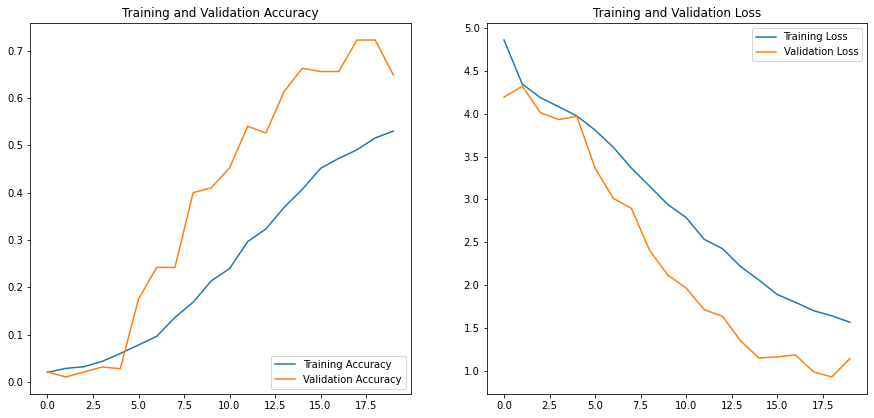

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
# Save the model as model.h1
model.save('model.h1')
# Load the model
model = load_model('model.h1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model.h1\assets


Prediction Dict:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}
Max index:  [57, 10, 22, 40, 23, 8, 8, 8, 20, 21, 22, 1, 40, 26, 10]


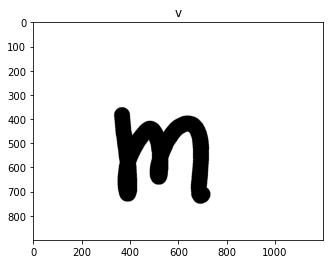

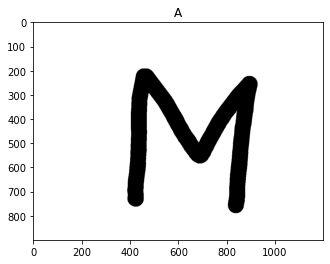

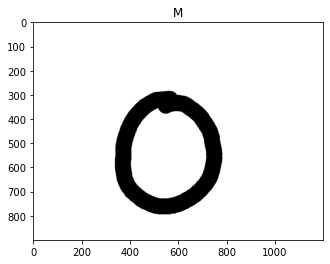

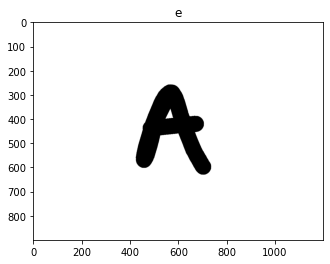

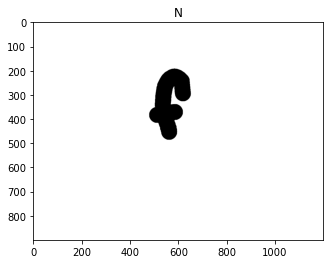

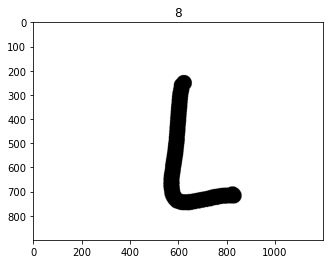

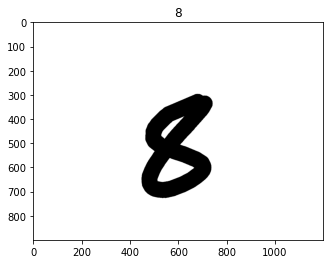

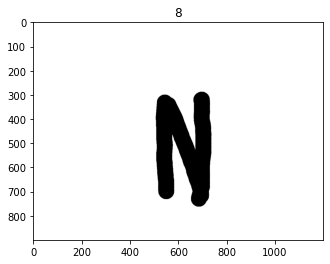

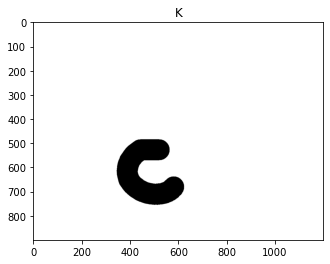

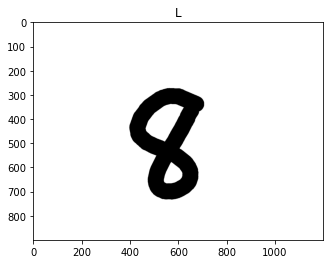

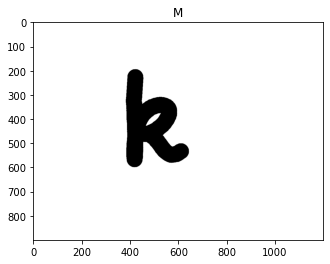

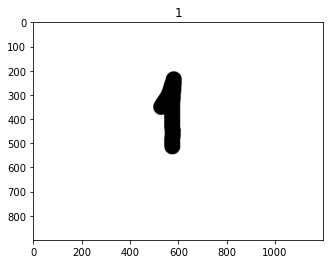

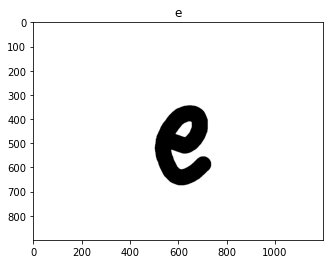

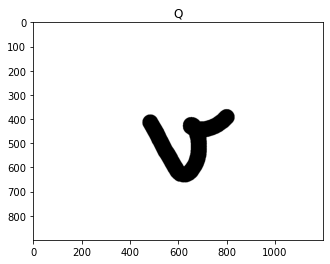

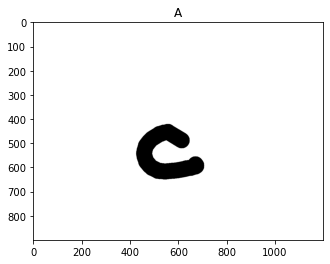

In [14]:
print("Prediction Dict: ", training_data_frame.class_indices)
# Predict on the test data 
pred = model.predict(test_data_frame)
# Create a class/labels dictionary
classDict = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

# Make a data frame that contains the probability for each class
outputDf = pd.DataFrame(pred)
# Get the index of the max probability from the output Data frame
maxIndex = list(outputDf.idxmax(axis=1))
# Print the max index
print("Max index: ", maxIndex)
# Make a loop in range the length of the test data (20)
for i in range(len(test_set)):
    # Read the image 
    image = cv.imread(DATAPATH + '/' + test_set.at[i, 'image'])
    # The title of the plot which is the predicted label
    plt.title(classDict.get(maxIndex[i], "error"))
    # Show the actual image
    plt.imshow(image)
    plt.show()
    